In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# **DATA EXPLORATION**

## **Feedback data**

In [2]:
feedback_data=pd.read_csv('/content/blinkit_customer_feedback.csv')
feedback_data.head(2)

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28


In [3]:
feedback_data.shape

(5000, 8)

In [4]:
feedback_data.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date'],
      dtype='object')

In [5]:
feedback_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [6]:
#number of unique values each columns
feedback_data.nunique()

,0
feedback_id,5000
order_id,5000
customer_id,2172
rating,5
feedback_text,25
feedback_category,4
sentiment,3
feedback_date,600


## **Customers data**

In [7]:
customer_data=pd.read_csv('/content/blinkit_customers.csv')
customer_data.head(2)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48


In [8]:
customer_data.shape

(2500, 11)

In [9]:
customer_data.columns

Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB


In [11]:
#number of unique values each columns
customer_data.nunique()

,0
customer_id,2500
customer_name,2491
email,2496
phone,2500
address,2500
area,316
pincode,2494
registration_date,589
customer_segment,4
total_orders,20


## **Delivery data**

In [12]:
delivery_data=pd.read_csv('/content/blinkit_delivery_performance.csv')
delivery_data.head(2)

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic


In [13]:
delivery_data.shape

(5000, 8)

In [14]:
delivery_data.columns

Index(['order_id', 'delivery_partner_id', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status',
       'reasons_if_delayed'],
      dtype='object')

In [15]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5000 non-null   int64  
 1   delivery_partner_id    5000 non-null   int64  
 2   promised_time          5000 non-null   object 
 3   actual_time            5000 non-null   object 
 4   delivery_time_minutes  5000 non-null   float64
 5   distance_km            5000 non-null   float64
 6   delivery_status        5000 non-null   object 
 7   reasons_if_delayed     3098 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 312.6+ KB


In [16]:
#number of unique values each columns
delivery_data.nunique()

,0
order_id,5000
delivery_partner_id,5000
promised_time,4999
actual_time,5000
delivery_time_minutes,36
distance_km,451
delivery_status,3
reasons_if_delayed,1


## **Marketing data**

In [17]:
marketing_data=pd.read_csv('/content/blinkit_marketing_performance.csv')
marketing_data.head(2)

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98


In [18]:
marketing_data.shape

(5400, 11)

In [19]:
marketing_data.columns

Index(['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel',
       'impressions', 'clicks', 'conversions', 'spend', 'revenue_generated',
       'roas'],
      dtype='object')

In [20]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


In [21]:
#number of unique values each columns
marketing_data.nunique()

,0
campaign_id,5400
campaign_name,9
date,600
target_audience,4
channel,4
impressions,4058
clicks,899
conversions,91
spend,5356
revenue_generated,5386


## **Items of order data**

In [22]:
items_data=pd.read_csv('/content/blinkit_order_items.csv')
items_data.head(2)

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42


In [23]:
items_data.shape

(5000, 4)

In [24]:
items_data.columns

Index(['order_id', 'product_id', 'quantity', 'unit_price'], dtype='object')

In [25]:
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [26]:
#number of unique values each columns
items_data.nunique()

,0
order_id,5000
product_id,268
quantity,3
unit_price,267


## **Orders data**

In [27]:
orders_data=pd.read_csv('/content/blinkit_orders.csv')
orders_data.head(2)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534


In [28]:
orders_data.shape

(5000, 10)

In [29]:
orders_data.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id'],
      dtype='object')

In [30]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [31]:
#number of unique values each columns
orders_data.nunique()

,0
order_id,5000
customer_id,2172
order_date,5000
promised_delivery_time,4999
actual_delivery_time,5000
delivery_status,3
order_total,4550
payment_method,4
delivery_partner_id,5000
store_id,5000


## **Products data**

In [32]:
products_data=pd.read_csv('/content/blinkit_products.csv')
products_data.head(2)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65


In [33]:
products_data.shape

(268, 10)

In [34]:
products_data.columns

Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')

In [35]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [36]:
#number of unique values each columns
products_data.nunique()

,0
product_id,268
product_name,51
category,11
brand,267
price,267
mrp,268
margin_percentage,6
shelf_life_days,5
min_stock_level,21
max_stock_level,51


## **Inventory data**

In [37]:
inventory_data=pd.read_csv('/content/blinkit_inventory.csv')
inventory_data.head(2)

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2


In [38]:
inventory_data.shape

(93277, 4)

In [39]:
inventory_data.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock'], dtype='object')

In [40]:
inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93277 entries, 0 to 93276
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      93277 non-null  int64 
 1   date            93277 non-null  object
 2   stock_received  93277 non-null  int64 
 3   damaged_stock   93277 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.8+ MB


In [41]:
#number of unique values each columns
inventory_data.nunique()

,0
product_id,268
date,621
stock_received,5
damaged_stock,8


# **DATA CLEANING**

## **1. Handling missing values**

## **Feedback data**

In [42]:
feedback_data.isnull().sum()
#No Missing Values

,0
feedback_id,0
order_id,0
customer_id,0
rating,0
feedback_text,0
feedback_category,0
sentiment,0
feedback_date,0


## **Customers data**

In [43]:
customer_data.isnull().sum()
#No Missing Values

,0
customer_id,0
customer_name,0
email,0
phone,0
address,0
area,0
pincode,0
registration_date,0
customer_segment,0
total_orders,0


## **Delivery data**

In [44]:
delivery_data.isnull().sum()
#Missing Values in reasons_if_delayed

,0
order_id,0
delivery_partner_id,0
promised_time,0
actual_time,0
delivery_time_minutes,0
distance_km,0
delivery_status,0
reasons_if_delayed,1902


In [45]:
#explore this field
delivery_data['reasons_if_delayed'].unique()

array([nan, 'Traffic'], dtype=object)

In [46]:
#handling nans-->imputing with constant (Unknown)
imputer=SimpleImputer(strategy='constant',fill_value='Unknown')
delivery_data[['reasons_if_delayed']]=imputer.fit_transform(delivery_data[['reasons_if_delayed']])


In [47]:
delivery_data['reasons_if_delayed'].unique()

array(['Unknown', 'Traffic'], dtype=object)

In [48]:
delivery_data.isnull().sum()
#No Missing Values

,0
order_id,0
delivery_partner_id,0
promised_time,0
actual_time,0
delivery_time_minutes,0
distance_km,0
delivery_status,0
reasons_if_delayed,0


## **Marketing data**

In [49]:
marketing_data.isnull().sum()
#No Missing Values

,0
campaign_id,0
campaign_name,0
date,0
target_audience,0
channel,0
impressions,0
clicks,0
conversions,0
spend,0
revenue_generated,0


## **Items of order data**

In [50]:
items_data.isnull().sum()
#No Missing Values

,0
order_id,0
product_id,0
quantity,0
unit_price,0


## **Orders data**

In [51]:
orders_data.isnull().sum()
#No Missing Values

,0
order_id,0
customer_id,0
order_date,0
promised_delivery_time,0
actual_delivery_time,0
delivery_status,0
order_total,0
payment_method,0
delivery_partner_id,0
store_id,0


## **Products data**

In [52]:
products_data.isnull().sum()
#No Missing Values

,0
product_id,0
product_name,0
category,0
brand,0
price,0
mrp,0
margin_percentage,0
shelf_life_days,0
min_stock_level,0
max_stock_level,0


## **Inventory data**

In [53]:
inventory_data.isnull().sum()
#No Missing Values

,0
product_id,0
date,0
stock_received,0
damaged_stock,0


## **2. Removing Duplicates**

## **Feedback data**

In [54]:
feedback_data.duplicated().sum()
#NO DUPLICATES

0

## **Customers data**

In [55]:
customer_data.duplicated().sum()
#NO DUPLICATES

0

## **Delivery data**

In [56]:
delivery_data.duplicated().sum()
#NO DUPLICATES

0

## **Marketing data**

In [57]:
marketing_data.duplicated().sum()
#NO DUPLICATES

0

## **Items of order data**

In [58]:
items_data.duplicated().sum()
#NO DUPLICATES

0

## **Orders data**

In [59]:
orders_data.duplicated().sum()
#NO DUPLICATES

0

## **Products data**

In [60]:
products_data.duplicated().sum()
#NO DUPLICATES

0

## **Inventory data**

In [61]:
inventory_data.duplicated().sum()
#-->7359 duplicated records

7359

In [62]:
inventory_data.head(2)

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2


In [63]:
#Remove exact duplicate rows-->the data already has over 93000 records so it wont affect it
inventory_data = inventory_data.drop_duplicates()

In [64]:
#Check for logical duplicates (same product & date)
inventory_data = inventory_data.groupby(["product_id", "date"], as_index=False).agg({
    "stock_received": "sum",  # Sum stock received on the same day
    "damaged_stock": "sum"  # Sum damages on the same day
})


In [65]:
inventory_data.head(2)

,product_id,date,stock_received,damaged_stock
0,4452,1/3/2024,3,0
1,4452,1/4/2024,3,2


In [66]:
#After removing duplications process and Aggregation process
inventory_data.shape

(80743, 4)

In [67]:
inventory_data.duplicated().sum()
#NO DUPLICATES

0

# **DATA TRANSFORMATION**

## **DATA_TYPE CONVERSION**

## **Feedback data**

In [68]:
feedback_data.dtypes

,0
feedback_id,int64
order_id,int64
customer_id,int64
rating,int64
feedback_text,object
feedback_category,object
sentiment,object
feedback_date,object


In [69]:
# Convert feedback_id, order_id and customer_id to string
feedback_data["feedback_id"] = feedback_data["feedback_id"].astype(str)
feedback_data["order_id"] = feedback_data["order_id"].astype(str)
feedback_data["customer_id"] = feedback_data["customer_id"].astype(str)

# Convert 'feedback_date' column to datetime format
feedback_data["feedback_date"] = pd.to_datetime(feedback_data["feedback_date"], format="%Y-%m-%d")

In [70]:
feedback_data['feedback_date'].isna().sum()
#no invalid dates

0

In [71]:
feedback_data.dtypes

,0
feedback_id,object
order_id,object
customer_id,object
rating,int64
feedback_text,object
feedback_category,object
sentiment,object
feedback_date,datetime64[ns]


## **Customers data**

In [72]:
customer_data

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...,...,...,...,...,...
2495,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50


In [73]:
customer_data.dtypes

,0
customer_id,int64
customer_name,object
email,object
phone,int64
address,object
area,object
pincode,int64
registration_date,object
customer_segment,object
total_orders,int64


In [74]:
# Convert customer_id to string
customer_data['customer_id'] =customer_data['customer_id'].astype(str)

# Convert registration_date to datetime
customer_data['registration_date'] = pd.to_datetime(customer_data['registration_date'], format='%Y-%m-%d')

# Standardize customer segment case
customer_data['customer_segment'] =customer_data['customer_segment'].str.capitalize()

# Clean the 'email' and 'area' columns
customer_data["email"] = customer_data["email"].str.strip().str.lower()  # Remove spaces & convert to lowercase
customer_data["area"] = customer_data["area"].str.strip().str.title()  # Remove spaces & format area names properly

In [75]:
#phone number preprocess
import pandas as pd
import re

def clean_phone_number(phone, default_country_code='+91'):
    """Cleans and standardizes phone numbers into international format."""
    if pd.isna(phone):  # Handle missing values
        return None

    phone = str(phone)  # Ensure it's a string
    phone = re.sub(r'\D', '', phone)  # Remove all non-digit characters

    if len(phone) == 10:
        return default_country_code + phone  # Add country code if it's a local number
    elif len(phone) > 10 and phone.startswith(default_country_code[1:]):
        return '+' + phone  # Ensure it starts with '+'
    else:
        return None  # Invalid phone number

# Apply to the dataframe
customer_data['phone'] = customer_data['phone'].apply(lambda x: clean_phone_number(x))


In [76]:
customer_data

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,+912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,+915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,+910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,+916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,+917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...,...,...,...,...,...
2495,48002829,Daksh Mandal,varkeymohammed@example.com,+919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,+916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,+917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,+911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50


In [77]:
customer_data.dtypes

,0
customer_id,object
customer_name,object
email,object
phone,object
address,object
area,object
pincode,int64
registration_date,datetime64[ns]
customer_segment,object
total_orders,int64


## **Delivery data**

In [78]:
delivery_data.dtypes

,0
order_id,int64
delivery_partner_id,int64
promised_time,object
actual_time,object
delivery_time_minutes,float64
distance_km,float64
delivery_status,object
reasons_if_delayed,object


In [79]:
# Convert order_id and delivery_partner_id to string
delivery_data['order_id'] =delivery_data['order_id'].astype(str)
delivery_data['delivery_partner_id'] =delivery_data['delivery_partner_id'].astype(str)

# Convert 'promised_time' and 'actual_time' to datetime format
delivery_data["promised_time"] = pd.to_datetime(delivery_data["promised_time"])
delivery_data["actual_time"] = pd.to_datetime(delivery_data["actual_time"])

# Normalize 'delivery_status' to ensure consistency
delivery_data["delivery_status"] = delivery_data["delivery_status"].str.lower().str.replace("_", " ").str.title()

In [80]:
delivery_data.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,Unknown
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,Unknown
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


In [81]:
delivery_data.dtypes

,0
order_id,object
delivery_partner_id,object
promised_time,datetime64[ns]
actual_time,datetime64[ns]
delivery_time_minutes,float64
distance_km,float64
delivery_status,object
reasons_if_delayed,object


## **Marketing data**

In [82]:
marketing_data.head(2)

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98


In [83]:
marketing_data.dtypes

,0
campaign_id,int64
campaign_name,object
date,object
target_audience,object
channel,object
impressions,int64
clicks,int64
conversions,int64
spend,float64
revenue_generated,float64


In [84]:
# Convert campaign_id to string
marketing_data['campaign_id'] =marketing_data['campaign_id'].astype(str)

# Convert 'date' to datetime format
marketing_data["date"] = pd.to_datetime(marketing_data["date"], format='%Y-%m-%d')

# Strip whitespace from text columns
marketing_data['campaign_name'] =marketing_data['campaign_name'].str.strip()
marketing_data['target_audience'] =marketing_data['target_audience'].str.strip()
marketing_data['channel'] =marketing_data['channel'].str.strip()

In [85]:
marketing_data.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


In [86]:
marketing_data.dtypes

,0
campaign_id,object
campaign_name,object
date,datetime64[ns]
target_audience,object
channel,object
impressions,int64
clicks,int64
conversions,int64
spend,float64
revenue_generated,float64


In [87]:
marketing_data['roas'].min()

1.5

## **Items of order data**

In [88]:
items_data.head(2)

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42


In [89]:
items_data.dtypes

,0
order_id,int64
product_id,int64
quantity,int64
unit_price,float64


In [90]:
# Convert order_id, product_id to string
items_data['order_id'] =items_data['order_id'].astype(str)
items_data['product_id'] =items_data['product_id'].astype(str)

In [91]:
items_data.dtypes

,0
order_id,object
product_id,object
quantity,int64
unit_price,float64


## **Orders data**

In [92]:
orders_data.head(2)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534


In [93]:
orders_data.dtypes

,0
order_id,int64
customer_id,int64
order_date,object
promised_delivery_time,object
actual_delivery_time,object
delivery_status,object
order_total,float64
payment_method,object
delivery_partner_id,int64
store_id,int64


In [94]:
# Convert order_id, customer_id, delivery_partner_id and store_id to string
orders_data['order_id'] =orders_data['order_id'].astype(str)
orders_data['customer_id'] =orders_data['customer_id'].astype(str)
orders_data['delivery_partner_id'] =orders_data['delivery_partner_id'].astype(str)
orders_data['store_id'] =orders_data['store_id'].astype(str)

# Convert 'order_date', 'promised_delivery_time' and 'actual_delivery_time' to datetime format
# First parse the strings as datetime and then extract only the date part
orders_data["order_date"] = pd.to_datetime(orders_data["order_date"])
orders_data["promised_delivery_time"] = pd.to_datetime(orders_data["promised_delivery_time"])
orders_data["actual_delivery_time"]= pd.to_datetime(orders_data["actual_delivery_time"])

In [95]:
orders_data.dtypes

,0
order_id,object
customer_id,object
order_date,datetime64[ns]
promised_delivery_time,datetime64[ns]
actual_delivery_time,datetime64[ns]
delivery_status,object
order_total,float64
payment_method,object
delivery_partner_id,object
store_id,object


## **Products data**

In [96]:
products_data.head(2)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65


In [97]:
products_data.dtypes

,0
product_id,int64
product_name,object
category,object
brand,object
price,float64
mrp,float64
margin_percentage,float64
shelf_life_days,int64
min_stock_level,int64
max_stock_level,int64


In [98]:
# Convert product_id to string
products_data['product_id'] =products_data['product_id'].astype(str)

In [99]:
products_data.dtypes

,0
product_id,object
product_name,object
category,object
brand,object
price,float64
mrp,float64
margin_percentage,float64
shelf_life_days,int64
min_stock_level,int64
max_stock_level,int64


## **Inventory data**

In [100]:
inventory_data

,product_id,date,stock_received,damaged_stock
0,4452,1/3/2024,3,0
1,4452,1/4/2024,3,2
2,4452,1/5/2024,3,2
3,4452,1/6/2023,0,2
4,4452,1/6/2024,0,2
...,...,...,...,...
80738,993331,9/4/2023,0,2
80739,993331,9/6/2024,3,0
80740,993331,9/7/2024,0,2
80741,993331,9/8/2024,3,2


In [101]:
inventory_data.date.value_counts()
#inconsistent date formats

,count
date,
23-Jun,268
23-May,268
24-Jan,268
24-Apr,268
23-Sep,268
...,...
14-11-2023,104
21-10-2023,104
11/1/2024,104


In [102]:
inventory_data.shape

(80743, 4)

In [103]:
inventory_data.dtypes

,0
product_id,int64
date,object
stock_received,int64
damaged_stock,int64


In [104]:
# Convert product_id to string
inventory_data['product_id'] =inventory_data['product_id'].astype(str)


from dateutil import parser
# Function to add a default year to incomplete date
def fix_partial_date(date_str, default_year=2025):
    try:
        # If the string contains only day and month, add a default year
        if "-" in date_str and len(date_str.split("-")[1]) == 3:
            date_str = f"{date_str}-{default_year}"

        # Try to parse the date
        return pd.to_datetime(parser.parse(date_str, dayfirst=True))
    except:
        return pd.NaT  # Return NaT for invalid date

# Apply function to the 'date' column
inventory_data["date"] =inventory_data["date"].apply(lambda x: fix_partial_date(str(x)))

# Fill NaT values with a meaningful default date (e.g., today or minimum date)
inventory_data["date"] =inventory_data["date"].fillna(pd.Timestamp.today())

# Format to unified YYYY-MM-DD
inventory_data["date"] =inventory_data["date"].dt.strftime("%Y-%m-%d")

## Convert 'date' to datetime format
inventory_data["date"] = pd.to_datetime(inventory_data["date"], format='%Y-%m-%d')

In [105]:
inventory_data.dtypes

,0
product_id,object
date,datetime64[ns]
stock_received,int64
damaged_stock,int64


In [106]:
inventory_data.shape
#rows not effected

(80743, 4)

In [107]:
inventory_data.date.value_counts()
#data is consistent and datetime type-->problem solved

,count
date,
2025-06-23,268
2025-05-23,268
2025-01-24,268
2025-04-24,268
2025-09-23,268
...,...
2023-11-14,104
2023-10-21,104
2024-01-11,104


# **Feature-Engineering**

## **Feedback data**

In [108]:
feedback_data.head(2)

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28


## **Customers data**

In [109]:
customer_data.head(2)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,+912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,+915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48


In [110]:
# Feature Engineering: Calculate customer tenure in days
customer_data['customer_tenure'] = (pd.to_datetime("today") - customer_data['registration_date']).dt.days

In [111]:
customer_data.head(2)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,customer_tenure
0,97475543,Niharika Nagi,ektataneja@example.org,+912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92,656
1,22077605,Megha Sachar,vedant45@example.com,+915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48,254


## **Delivery data**

In [112]:
delivery_data.head(2)

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,Unknown
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic


In [113]:
# Create a new column to indicate early deliveries
delivery_data['early_delivery'] = delivery_data['delivery_time_minutes'].apply(lambda x: 1 if x < 0 else 0)
#(Binary Feature) ✅

# Categorize delivery time
delivery_data['time_difference_category'] = delivery_data['delivery_time_minutes'].apply(
    lambda x: 'Early' if x < 0 else ('On Time' if x == 0 else 'Late')
)
#(Categorical Feature) ✅

# Create an absolute value column for better numerical analysis if needed
delivery_data['absolute_delivery_time'] = delivery_data['delivery_time_minutes'].abs()
#(Numerical Feature) ✅


In [114]:
delivery_data.head(2)

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,early_delivery,time_difference_category,absolute_delivery_time
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,Unknown,1,Early,5.0
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic,0,Late,2.0


## **Marketing data**

In [115]:
marketing_data.head(2)

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98


In [116]:
# Calculate Click-Through Rate (CTR)
marketing_data['CTR'] = marketing_data['clicks'] / marketing_data['impressions']

# Calculate Conversion Rate
marketing_data['Conversion Rate'] = marketing_data['conversions'] / marketing_data['clicks']

# Calculate Profit
marketing_data['Profit'] = marketing_data['revenue_generated'] - marketing_data['spend']


In [117]:
marketing_data.head(2)

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas,CTR,Conversion Rate,Profit
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60,0.052077,0.478528,3345.90
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98,0.125860,0.091093,1731.77


##**Items of order data**

In [118]:
items_data.head(2)

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42


product_id
51036     70
820973    68
604184    62
34186     61
992178    60
880510    58
89084     56
673058    56
123983    55
557908    55
Name: quantity, dtype: int64


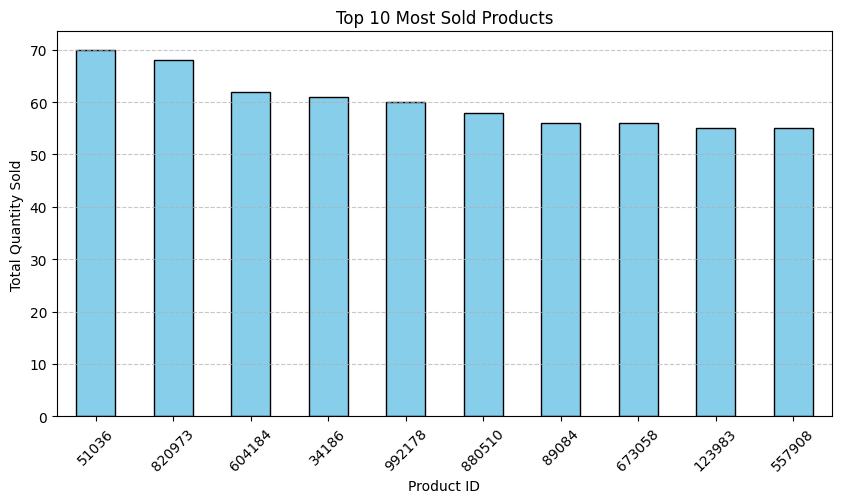

In [119]:
# Create total price column
items_data["total_price"] = items_data["quantity"] * items_data["unit_price"]

# Identify popular products (top 10 most sold)
top_products = items_data.groupby("product_id")["quantity"].sum().sort_values(ascending=False).head(10)
print(top_products)

#visualize the top 10
import matplotlib.pyplot as plt

# Identify top 10 most sold products
top_products = items_data.groupby("product_id")["quantity"].sum().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="skyblue", edgecolor="black")

# Customize the chart
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Most Sold Products")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()



In [120]:
items_data.head(2)

,order_id,product_id,quantity,unit_price,total_price
0,1961864118,642612,3,517.03,1551.09
1,1549769649,378676,1,881.42,881.42


## **Orders data**

In [121]:
orders_data.head(2)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534


## **Products data**

In [122]:
products_data.head(2)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65


In [123]:
#Feature Engineering
products_data['discount_percentage'] = ((products_data['mrp'] - products_data['price']) / products_data['mrp']) * 100

In [124]:
products_data.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,discount_percentage
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,24.999802
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,25.001474
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,24.999116
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,24.999105
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,24.999471


## **Inventory data**

In [125]:
inventory_data.head(2)

,product_id,date,stock_received,damaged_stock
0,4452,2024-03-01,3,0
1,4452,2024-04-01,3,2


In [126]:
# Extract date-related features
inventory_data["year"] =inventory_data["date"].dt.year
inventory_data["month"] =inventory_data["date"].dt.month
inventory_data["day_of_week"] =inventory_data["date"].dt.dayofweek
inventory_data["is_weekend"] =inventory_data["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

In [127]:
inventory_data.head(2)

,product_id,date,stock_received,damaged_stock,year,month,day_of_week,is_weekend
0,4452,2024-03-01,3,0,2024,3,4,0
1,4452,2024-04-01,3,2,2024,4,0,0


# **SAVE PREPROCESSED DATA**

In [128]:
# Save as Excel (without index)
feedback_data.to_excel("cleaned_feedback.xlsx", index=False)
customer_data.to_excel("cleaned_customers.xlsx", index=False)
delivery_data.to_excel("cleaned_delivery.xlsx", index=False)
marketing_data.to_excel("cleaned_marketing.xlsx", index=False)
items_data.to_excel("cleaned_items.xlsx", index=False)
orders_data.to_excel("cleaned_orders.xlsx", index=False)
products_data.to_excel("cleaned_products.xlsx", index=False)
inventory_data.to_excel("cleaned_inventory.xlsx", index=False)

# **DOWNLOAD THE CLEANED DATA**

In [129]:
from google.colab import files
#download
files.download("cleaned_feedback.xlsx")
files.download("cleaned_customers.xlsx")
files.download("cleaned_delivery.xlsx")
files.download("cleaned_marketing.xlsx")
files.download("cleaned_items.xlsx")
files.download("cleaned_orders.xlsx")
files.download("cleaned_products.xlsx")
files.download("cleaned_inventory.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **DATA VISUALIZATION**

In [130]:
# Set plot style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## **1. Customer Registration Distribution**

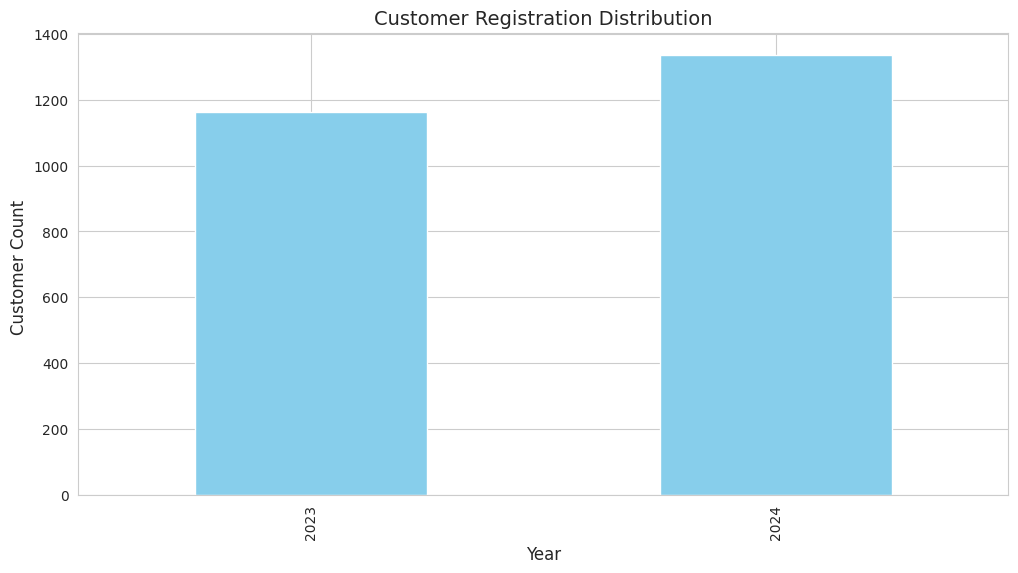

In [131]:
plt.figure(figsize=(12,6))
customer_data["registration_date"].dt.year.value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Customer Registration Distribution")
plt.xlabel("Year")
plt.ylabel("Customer Count ")
plt.show()

## **2. Daily Orders Trend**

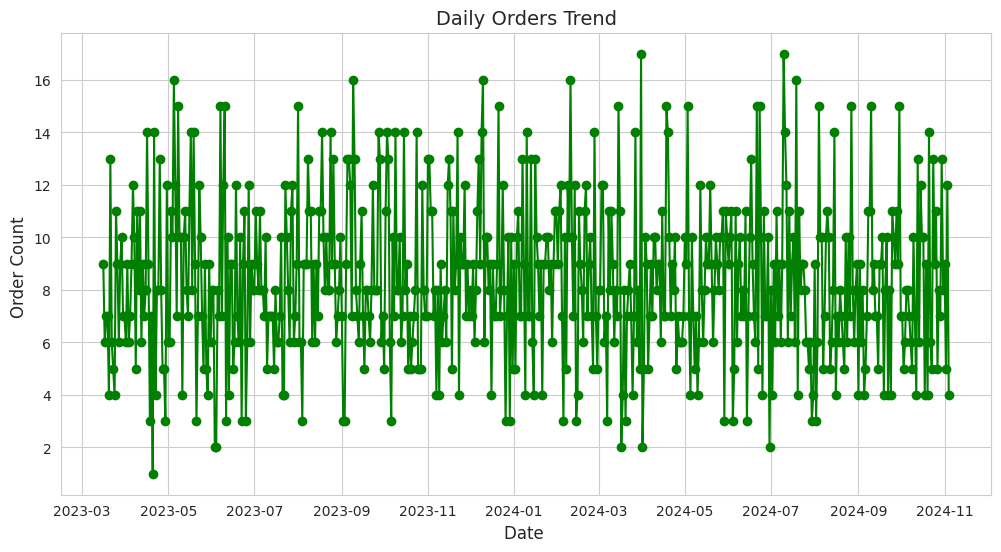

In [132]:
plt.figure(figsize=(12,6))
orders_data.groupby(orders_data["order_date"].dt.date).size().plot(kind="line", marker="o", color="green")
plt.title("Daily Orders Trend")
plt.xlabel("Date ")
plt.ylabel("Order Count ")
plt.show()

## **3. Orders by Hour**

<ipython-input-133-3f48cc781142>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=orders_data["hour"], palette="coolwarm")


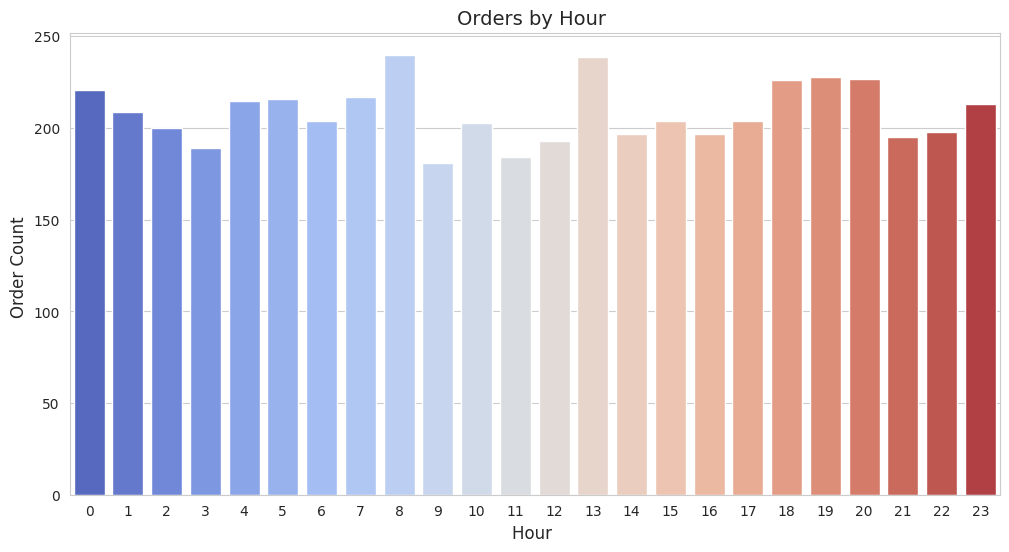

In [133]:
plt.figure(figsize=(12,6))
orders_data["hour"] = pd.to_datetime(orders_data["order_date"]).dt.hour
sns.countplot(x=orders_data["hour"], palette="coolwarm")
plt.title("Orders by Hour ")
plt.xlabel("Hour ")
plt.ylabel("Order Count ")
plt.show()

## **4. Orders by Area**

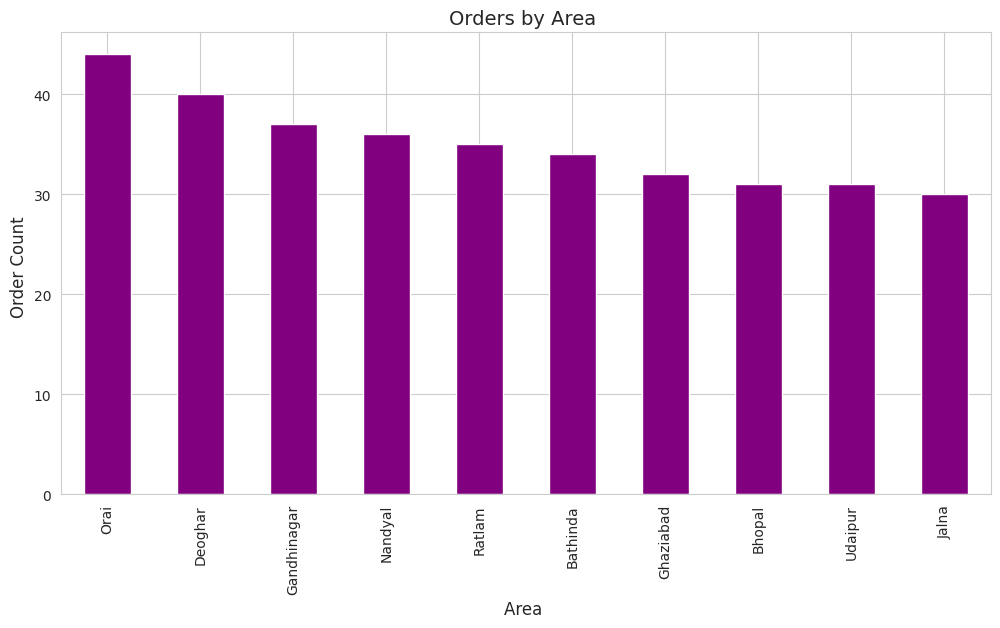

In [134]:
plt.figure(figsize=(12,6))
customer_orders = orders_data.merge(customer_data, on="customer_id", how="left")
customer_orders["area"].value_counts().nlargest(10).plot(kind="bar", color="purple")
plt.title("Orders by Area ")
plt.xlabel("Area ")
plt.ylabel("Order Count ")
plt.show()

## **5. Customer Segmentation**

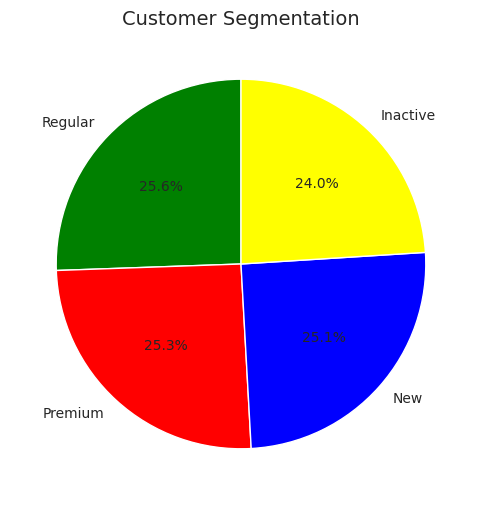

In [135]:
plt.figure(figsize=(12,6))
customer_data["customer_segment"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["green", "red", "blue", "yellow"], startangle=90)
plt.title("Customer Segmentation")
plt.ylabel("")
plt.show()

## **6. Sales by Product Category**

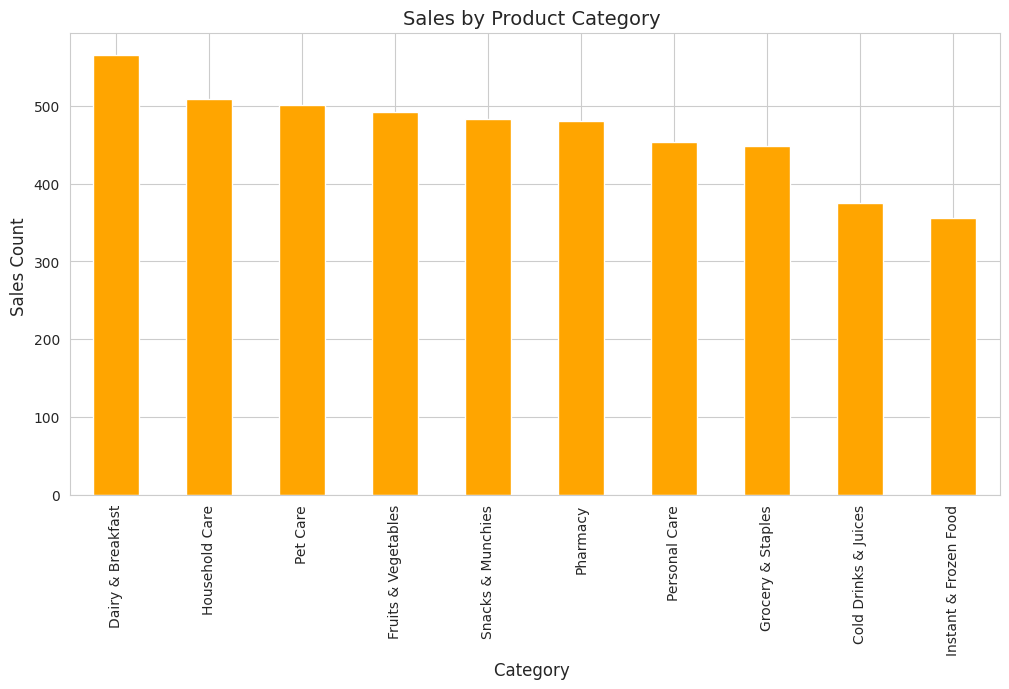

In [136]:
plt.figure(figsize=(12,6))
product_sales = items_data.merge(products_data, on="product_id", how="left")
product_sales["category"].value_counts().nlargest(10).plot(kind="bar", color="orange")
plt.title("Sales by Product Category ")
plt.xlabel("Category ")
plt.ylabel("Sales Count ")
plt.show()

## **7.Delivery Distance Distribution**

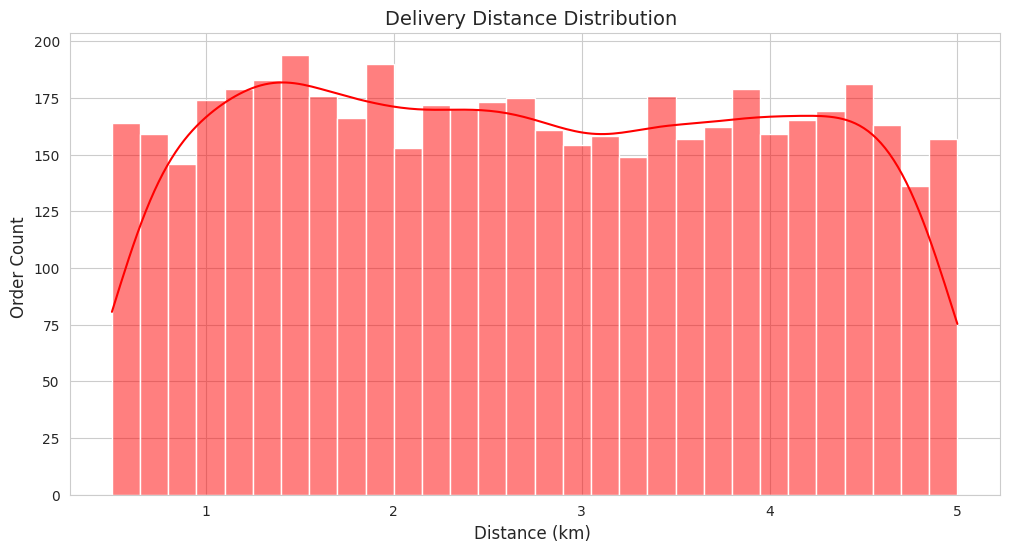

In [137]:
plt.figure(figsize=(12,6))
sns.histplot(delivery_data["distance_km"], bins=30, kde=True, color="red")
plt.title("Delivery Distance Distribution ")
plt.xlabel("Distance (km) ")
plt.ylabel("Order Count ")
plt.show()

## **8.Orders by Day of Week**

<ipython-input-138-bee91b50cd69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=orders_data["day_of_week"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")


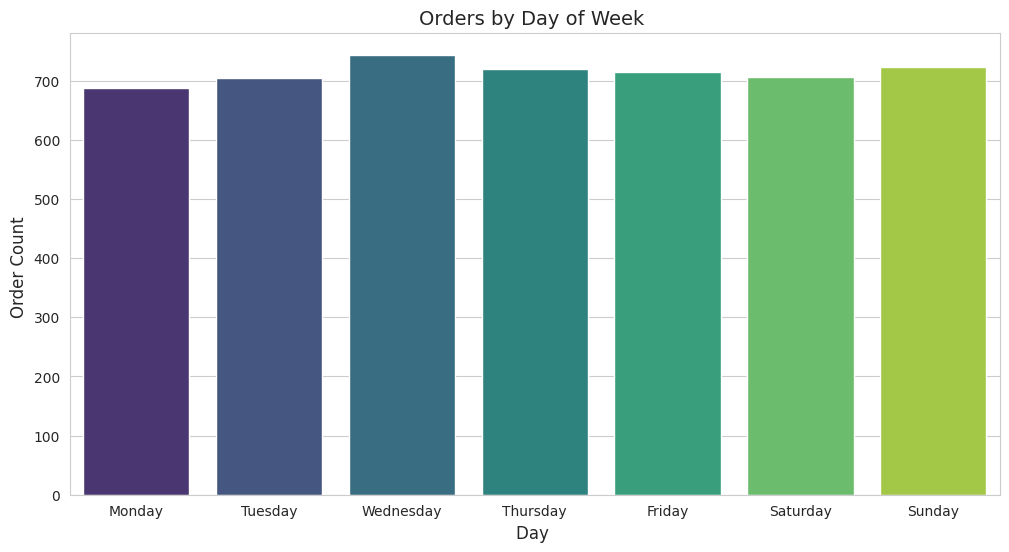

In [138]:
plt.figure(figsize=(12,6))
orders_data["day_of_week"] = pd.to_datetime(orders_data["order_date"]).dt.day_name()
sns.countplot(x=orders_data["day_of_week"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")
plt.title("Orders by Day of Week ")
plt.xlabel("Day ")
plt.ylabel("Order Count ")
plt.show()

## **9.Orders by Season**

<ipython-input-139-1e7d84791044>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=orders_data["season"], palette="coolwarm")


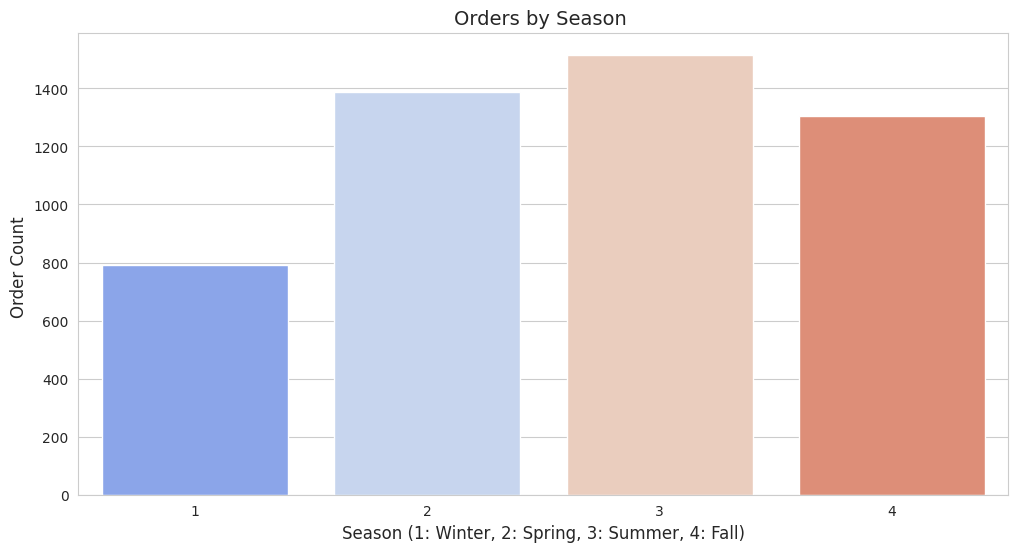

In [139]:
plt.figure(figsize=(12,6))
orders_data["season"] = orders_data["order_date"].dt.month % 12 // 3 + 1
sns.countplot(x=orders_data["season"], palette="coolwarm")
plt.title("Orders by Season ")
plt.xlabel("Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)")
plt.ylabel("Order Count ")
plt.show()

## **10. Damaged stock by product count**

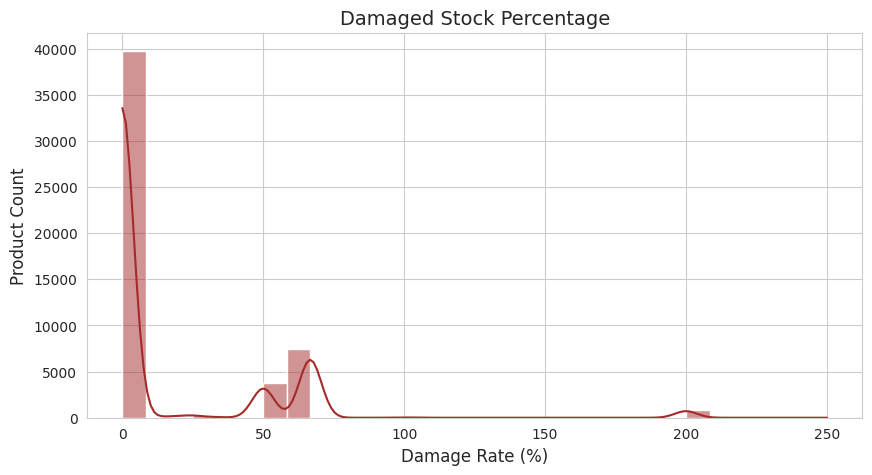

In [140]:
plt.figure(figsize=(10,5))
inventory_data["damage_rate"] = inventory_data["damaged_stock"] / inventory_data["stock_received"] * 100
sns.histplot(inventory_data["damage_rate"], bins=30, kde=True, color="brown")
plt.title("Damaged Stock Percentage")
plt.xlabel("Damage Rate (%)")
plt.ylabel("Product Count")
plt.show()

## **11. Price vs MRP Scatter Plot**

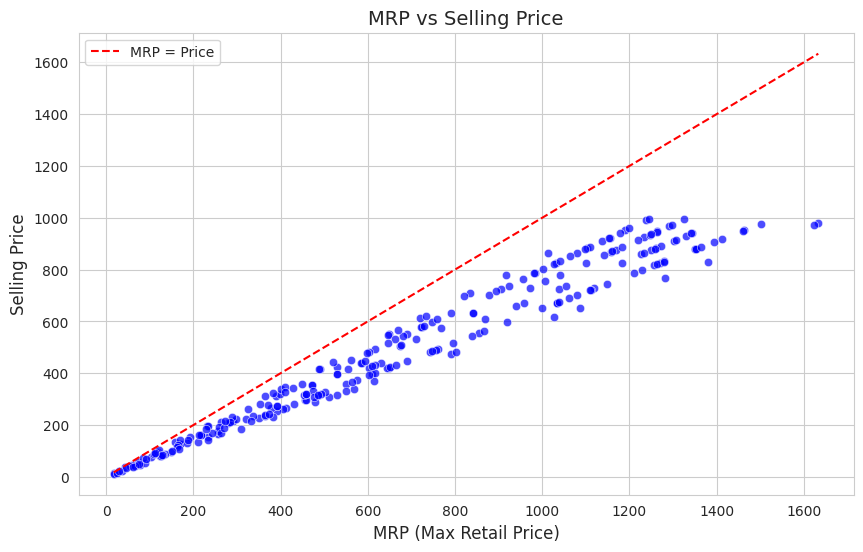

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=products_data, x="mrp", y="price", alpha=0.7, color="blue")
plt.plot([products_data["mrp"].min(), products_data["mrp"].max()], [products_data["mrp"].min(), products_data["mrp"].max()], "r--", label="MRP = Price")
plt.title("MRP vs Selling Price")
plt.xlabel("MRP (Max Retail Price)")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

## **12. Top 10 Products**

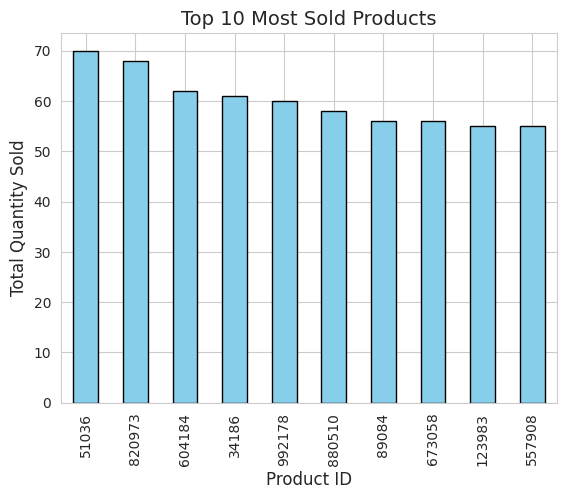

In [142]:
import matplotlib.pyplot as plt

# Plot bar chart
top_products.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Most Sold Products")

# Show plot
plt.show()


## **13. Margin Percentage Distribution**

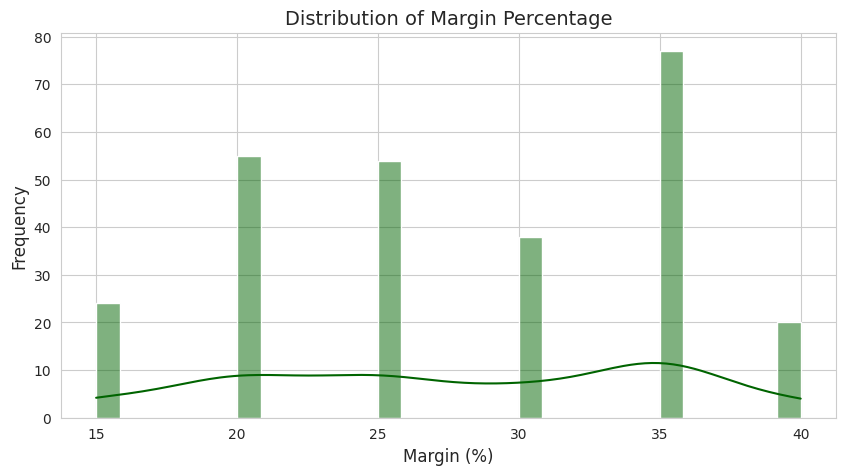

In [143]:
plt.figure(figsize=(10, 5))
sns.histplot(products_data["margin_percentage"], bins=30, kde=True, color="darkgreen")
plt.title("Distribution of Margin Percentage")
plt.xlabel("Margin (%)")
plt.ylabel("Frequency")
plt.show()

## **14. Shelf Life Distribution**

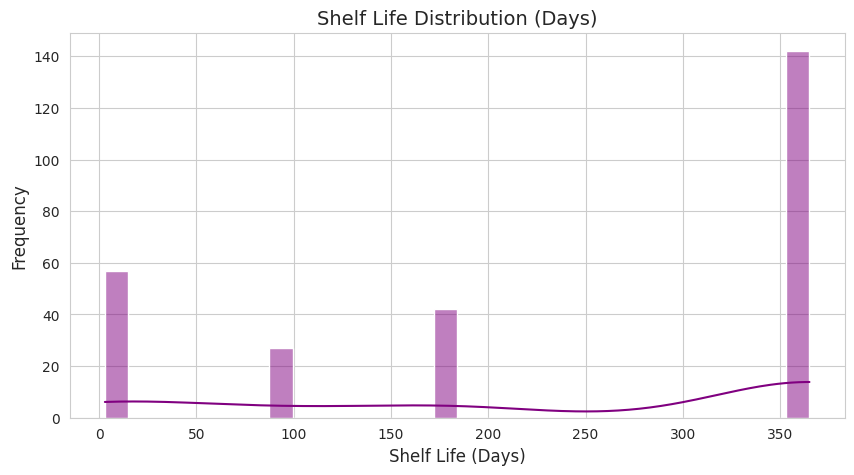

In [144]:
plt.figure(figsize=(10, 5))
sns.histplot(products_data["shelf_life_days"], bins=30, kde=True, color="purple")
plt.title("Shelf Life Distribution (Days)")
plt.xlabel("Shelf Life (Days)")
plt.ylabel("Frequency")
plt.show()

## **15. Category-wise Product Distribution**

<ipython-input-145-93b6f56a87d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_data, y="category", order=products_data["category"].value_counts().index, palette="Blues_r")


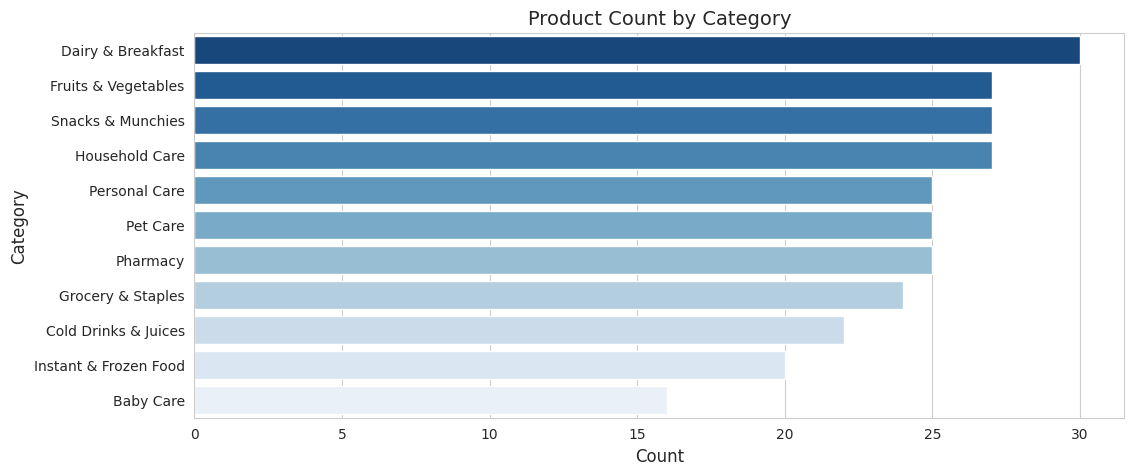

In [145]:
plt.figure(figsize=(12, 5))
sns.countplot(data=products_data, y="category", order=products_data["category"].value_counts().index, palette="Blues_r")
plt.title("Product Count by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

## **16. Brand-wise Product Count (Top 10 Brands)**

<ipython-input-146-84b26d17376d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="coolwarm")


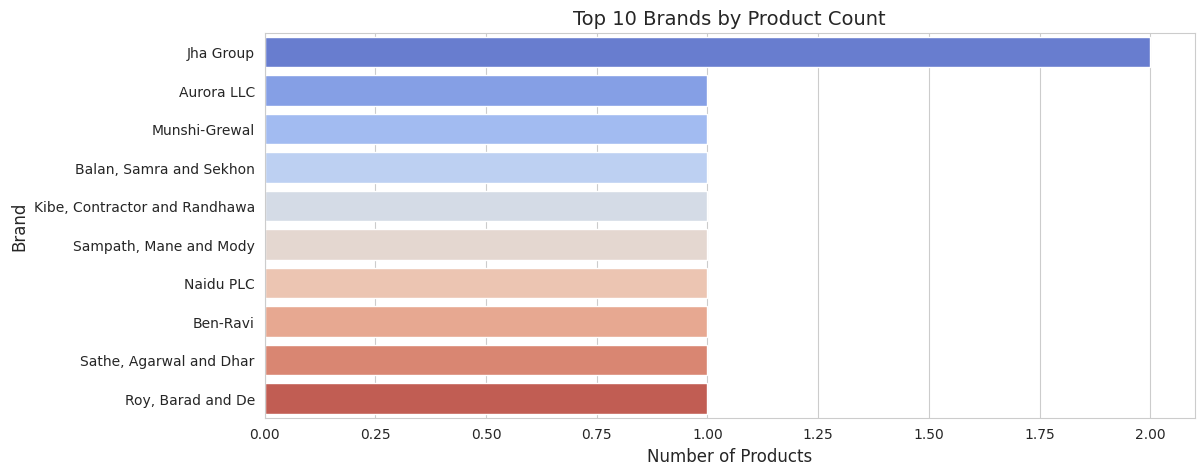

In [146]:
top_brands = products_data["brand"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="coolwarm")
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

## **17. Min vs Max Stock Level**

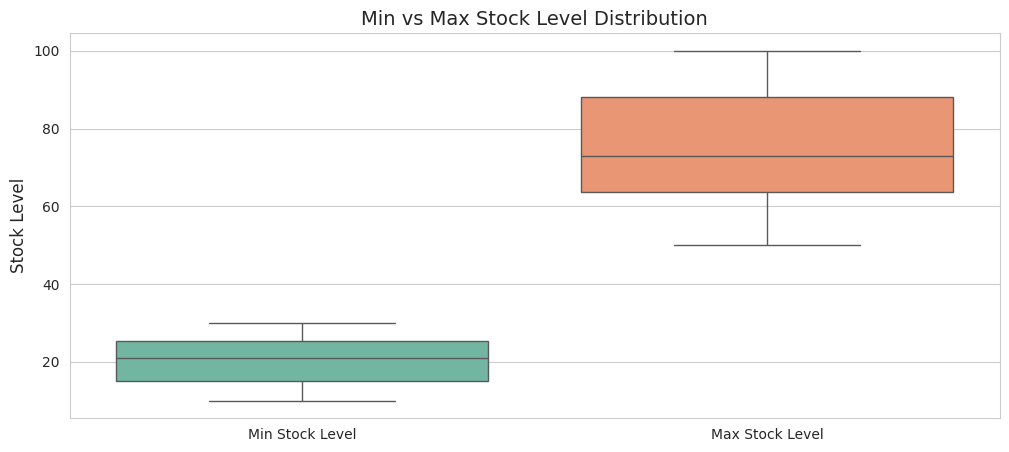

In [147]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=products_data[["min_stock_level", "max_stock_level"]], palette="Set2")
plt.title("Min vs Max Stock Level Distribution")
plt.ylabel("Stock Level")
plt.xticks(ticks=[0, 1], labels=["Min Stock Level", "Max Stock Level"])
plt.show()